Import all libraries that will be used

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import randint

Define a target function

In [42]:
#target function
def target(x):
    return 2-x

Generate labels and randomly place them along our target function. Define y_labels as 1 and -1. 

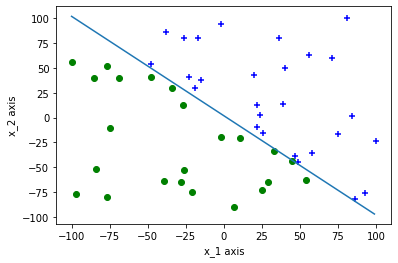

In [62]:
seed(0)
n = 50
# generate some random numbers
x_1 = np.zeros(n)
x_2 = np.zeros(n)
y_labels = np.zeros(n)

for i in range (0,n):
    x_1[i] = randint(-100,100)
    x_2[i] = randint(-100,100)
    if x_2[i]>f_x(x_1[i]):
        y_labels[i] = 1
    else:
        y_labels[i] = -1


a = np.arange(-100,100)
plt.plot(a,f_x(a))
for i in range(0,n):
    if y_labels[i] == 1:
        plt.scatter(x_1[i],x_2[i], color = 'blue',marker = '+')
    else:
        plt.scatter(x_1[i],x_2[i], color = 'green')
plt.xlabel("x_1 axis")
plt.ylabel("x_2 axis")
plt.show()

Construct X and Y matrices

In [63]:
X = np.zeros((n,3))

for i in range (0,n):
    for j in range (0,3):
        if j == 0:
            X[i][j] = 1
        elif j == 1:
            X[i][j] = x_1[i]
        else:
            X[i][j] = x_2[i]
print (X)

Y = np.zeros(n)
for k in range(0, n):
    Y[k] = y_labels[k]

print(Y)

[[   1.   -2.   94.]
 [   1.    7.  -90.]
 [   1.  -34.   30.]
 [   1.   24.    3.]
 [   1.  100.  -23.]
 [   1.   22.   -9.]
 [   1.   49.  -45.]
 [   1.   29.  -65.]
 [   1.  -28.  -65.]
 [   1.   93.  -76.]
 [   1.   58.  -36.]
 [   1.   36.   80.]
 [   1.   54.  -63.]
 [   1.  -21.  -75.]
 [   1.   86.  -82.]
 [   1.   75.  -16.]
 [   1.   20.   43.]
 [   1.  -75.  -10.]
 [   1.   11.  -20.]
 [   1.   56.   63.]
 [   1.  -48.   41.]
 [   1.   22.   13.]
 [   1.   33.  -34.]
 [   1.  -85.   40.]
 [   1.  -97.  -77.]
 [   1.   84.    2.]
 [   1.   81.  100.]
 [   1.   71.   60.]
 [   1. -100.   56.]
 [   1.   26.  -15.]
 [   1.  -38.   86.]
 [   1.  -17.   80.]
 [   1.  -84.  -52.]
 [   1.   45.  -44.]
 [   1.  -39.  -64.]
 [   1.   39.   14.]
 [   1.  -77.  -80.]
 [   1.  -19.   30.]
 [   1.   25.  -73.]
 [   1.  -23.   41.]
 [   1.  -26.   80.]
 [   1.  -69.   40.]
 [   1.  -15.   38.]
 [   1.  -48.   54.]
 [   1.   40.   50.]
 [   1.  -27.   13.]
 [   1.  -77.   52.]
 [   1.   -2.

In [64]:
def error(X, Y, w):
    err = 0
    for i in range(0,len(X)):
        if (w[0]+w[1]*X[i][1]+w[2]*X[i][2])*Y[i] <= 0:
            err = err+1
        else:
            err = err+0

    return err

In [65]:
def perceptron(X, Y, w):
    correct_pred = 1
    while correct_pred > 0:
        correct_pred = 1
        for i in range(0,len(X)):
            if (w[0]+w[1]*X[i][1]+w[2]*X[i][2])*Y[i] <= 0:
                  w = w + Y[i]*X[i]
                  break
            else:
                correct_pred = correct_pred + 1
        if correct_pred==len(X)+1: #no more mistakes
            break

    return w

In [66]:
def pocket(X, y_labels):
    w_pocket = np.array([0,0,0])
    best_error = error(X,y_labels, w_pocket)
    for i in range(0, 1000):
        w_new = perceptron(X,y_labels, w_pocket)
        new_error = error(X, y_labels, w_new)
        #print(w_new)
        #print(new_error)
        #print(best_error)
        if new_error < best_error:
            w_pocket = w_new
            best_error = error(X,y_labels,w_new)

    return w_pocket

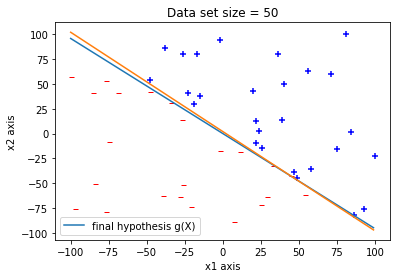

In [67]:
w = pocket(X, Y)
x_ax = np.arange(-100, 100)
slope = -w[1]/w[2]
y_ax = slope*x_ax
plt.plot(x_ax, y_ax, '-',label='final hypothesis g(X)')
plt.legend()
a = np.arange(-100,100)
plt.plot(a, target(a))
for i in range(0, n):
    if y_labels[i] == 1:
        plt.scatter(x_1[i],x_2[i], color = 'blue', marker = '+')
    else:
        plt.scatter(x_1[i],x_2[i], color = 'red', marker = '$-$')
plt.xlabel("x1 axis")
plt.ylabel("x2 axis")
plt.title("Data set size = %s" %n)
plt.show()